#Name : Md Imamuddin

 # Project 1: General EDA on Global Superstore Dataset

1. Dataset Selection

Use a dataset like Global Superstore with columns such as:

        i. Sales

        ii.Profit

        iii.Region

        iv.Product Category

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Global_Superstore2.csv", encoding='ISO-8859-1')


In [6]:
# Initial Exploration
print(df.shape)
print(df.info())
print(df.describe())

(51290, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    512

In [8]:
# Handling Missing Values
df = df.dropna()

In [9]:
# Removing Duplicates
df = df.drop_duplicates()

In [11]:
# Select only numeric columns for IQR method
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [12]:
print(df.shape)
print(df.describe())


(6986, 24)
             Row ID   Postal Code        Sales     Quantity     Discount  \
count   6986.000000   6986.000000  6986.000000  6986.000000  6986.000000   
mean   36290.258088  55431.181935    70.066728     3.399656     0.095624   
std     2880.819265  32806.458267    83.731862     1.879024     0.106243   
min    31299.000000   1040.000000     0.990000     1.000000     0.000000   
25%    33793.250000  22204.000000    15.265000     2.000000     0.000000   
50%    36302.500000  55247.000000    36.380000     3.000000     0.000000   
75%    38744.250000  90036.000000    91.680000     4.000000     0.200000   
max    41289.000000  99301.000000   492.835000     9.000000     0.500000   

            Profit  Shipping Cost  
count  6986.000000    6986.000000  
mean     12.773900       6.881191  
std      16.875569       8.686959  
min     -39.637000       0.010000  
25%       3.228000       1.300000  
50%       8.132400       3.310000  
75%      19.023000       8.855000  
max      70.7220

In [14]:
# Use only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Statistical Analysis
print("Mean:\n", numeric_df.mean())
print("Correlation Matrix:\n", numeric_df.corr())

Mean:
 Row ID           36290.258088
Postal Code      55431.181935
Sales               70.066728
Quantity             3.399656
Discount             0.095624
Profit              12.773900
Shipping Cost        6.881191
dtype: float64
Correlation Matrix:
                  Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.017445  0.011978  0.003300  0.003598 -0.009282   
Postal Code    0.017445     1.000000  0.048195  0.013974  0.066339 -0.015989   
Sales          0.011978     0.048195  1.000000  0.129710  0.118958  0.405566   
Quantity       0.003300     0.013974  0.129710  1.000000 -0.028687  0.233285   
Discount       0.003598     0.066339  0.118958 -0.028687  1.000000 -0.319001   
Profit        -0.009282    -0.015989  0.405566  0.233285 -0.319001  1.000000   
Shipping Cost  0.001717     0.034399  0.786930  0.114539  0.091401  0.359001   

               Shipping Cost  
Row ID              0.001717  
Postal Code         0.034399  
Sales        

<ipython-input-15-249681a0be94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
<ipython-input-15-249681a0be94>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')


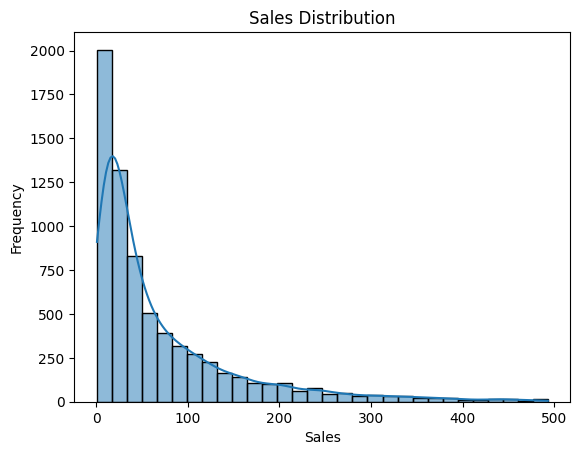

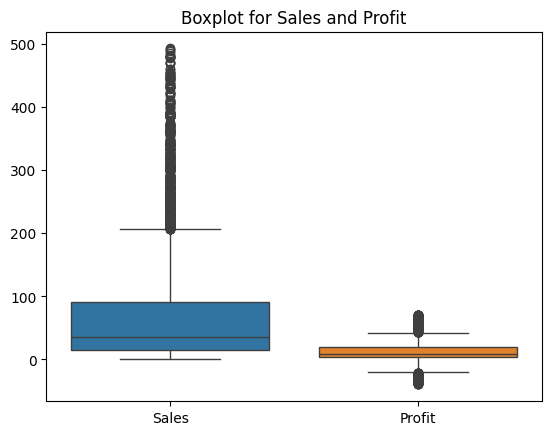

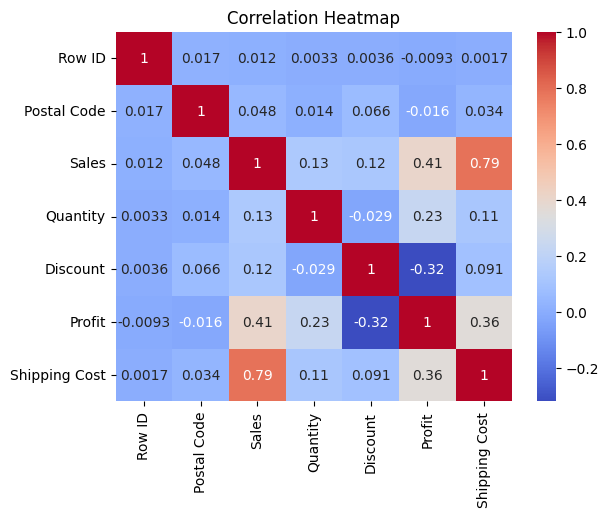

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

# Drop rows with missing numeric values
df_cleaned = df[['Sales', 'Profit']].dropna()

# Histogram for Sales
sns.histplot(df_cleaned['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Boxplot for Sales and Profit
sns.boxplot(data=df_cleaned[['Sales', 'Profit']])
plt.title("Boxplot for Sales and Profit")
plt.show()

# Heatmap for correlation of all numeric columns
numeric_df = df.select_dtypes(include=['number']).dropna()
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


 # Project 2: Sales Performance Analysis
1. Dataset Structure
Use sales_data.csv with columns:

        Product, Region, Sales, Profit, Discount, Category, Date

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#  Load the dataset with proper encoding
df = pd.read_csv('/content/Global_Superstore2.csv', encoding='ISO-8859-1')

In [32]:
# Clean column names: remove spaces and uppercase
df.columns = df.columns.str.strip().str.upper()

# Rename 'ORDER DATE' for convenience
df.rename(columns={'ORDERDATE': 'ORDERDATE'}, inplace=True)

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

#  Drop rows where ORDERDATE is NaT
df.dropna(subset=['ORDERDATE'], inplace=True)

# Set ORDERDATE as index for time series analysis
df.set_index('ORDERDATE', inplace=True)

#  Fill numeric missing values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

<ipython-input-33-5c5eece1536e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['SALES'].resample('M').sum().plot(figsize=(10, 5), marker='o')
<ipython-input-33-5c5eece1536e>:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


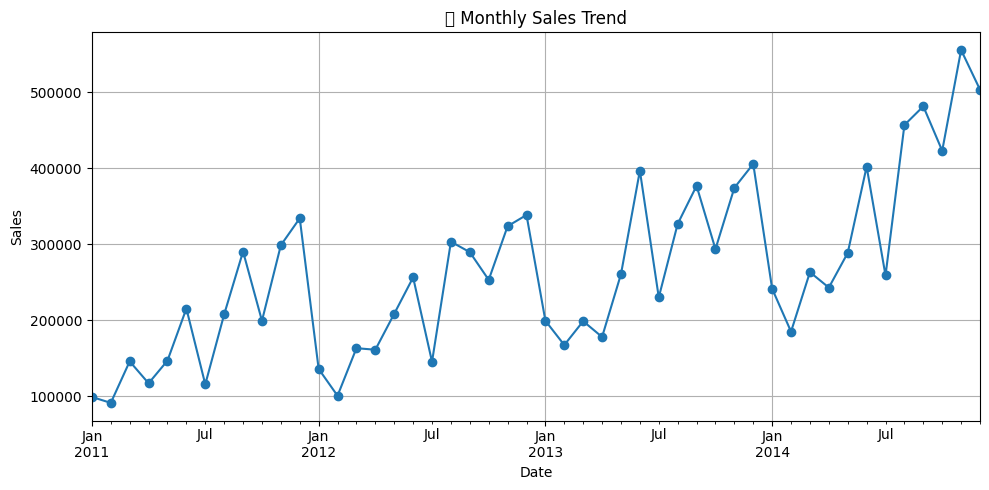

In [33]:
# 1. Time Series Plot: Monthly Sales Trend
df['SALES'].resample('M').sum().plot(figsize=(10, 5), marker='o')
plt.title(" Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

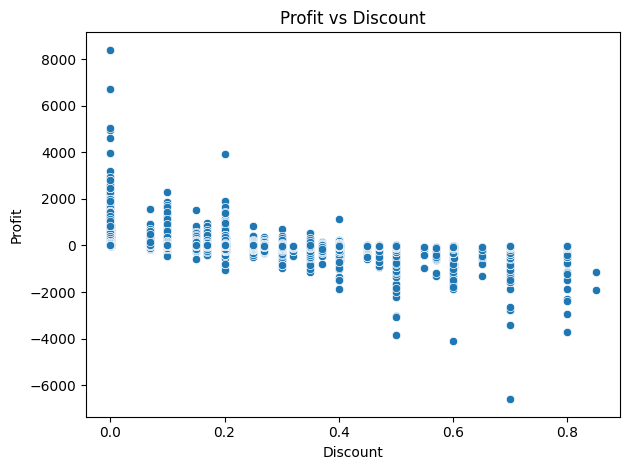

In [35]:
# 2. Scatter Plot: Profit vs Discount
sns.scatterplot(x='DISCOUNT', y='PROFIT', data=df)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

<ipython-input-36-0d37107bd5c8>:5: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


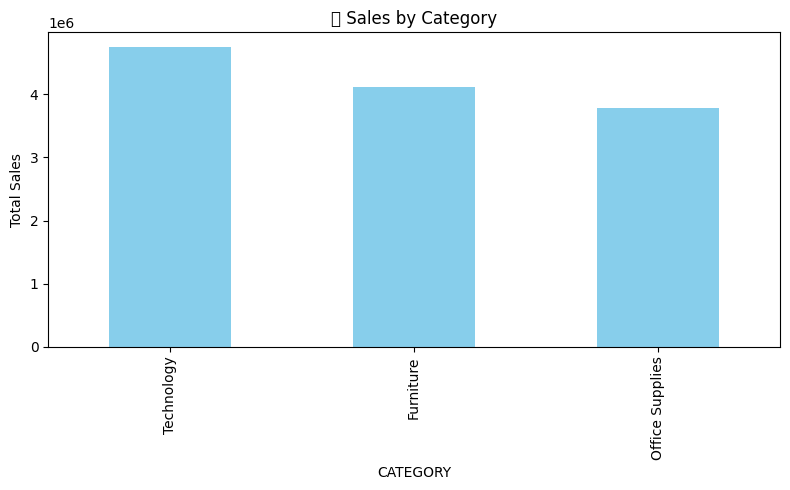

In [36]:
# 3. Bar Plot: Total Sales by Category
category_sales = df.groupby('CATEGORY')['SALES'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(8, 5), title="Sales by Category", color='skyblue')
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

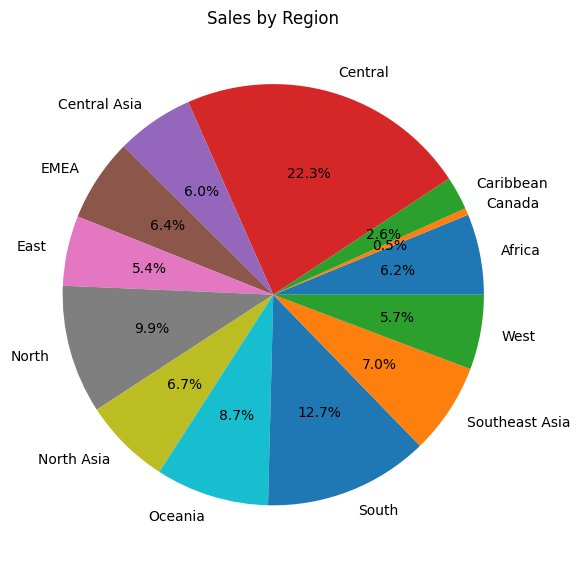

In [37]:
# 4. Pie Chart: Sales Distribution by Region
region_sales = df.groupby('REGION')['SALES'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', title="Sales by Region", figsize=(6, 6))
plt.ylabel("")
plt.tight_layout()
plt.show()

In [38]:
# 5.Predictive Modeling: Predict SALES from DISCOUNT & QUANTITY
X = df[['DISCOUNT', 'QUANTITY']]
y = df['SALES']

In [39]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Linear Regression Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

🔍 Linear Regression Performance:
R² Score: 0.13285334740530041
Mean Squared Error (MSE): 194065.4888531673
